#### Xây dựng mô hình VAR: Dữ liệu kinh tế Tây Đức (1960 - 1978)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tải dữ liệu và biến đổi logarit
westGM = pd.read_excel('../Data/West German.xlsx')[:76]
westGM = np.log(westGM)
westGM.head()

,invest,income,cons
0,5.192957,6.111467,6.028279
1,5.187386,6.142037,6.042633
2,5.220356,6.184149,6.073045
3,5.257495,6.200509,6.104793
4,5.351858,6.232448,6.129050


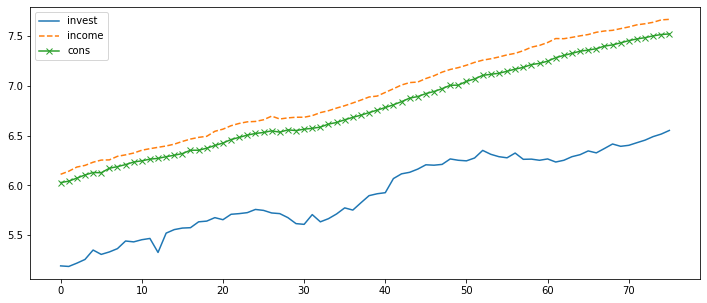

In [3]:
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12,5))
westGM.plot(style = ["-", "--", "x-"], ax = ax)
plt.show()

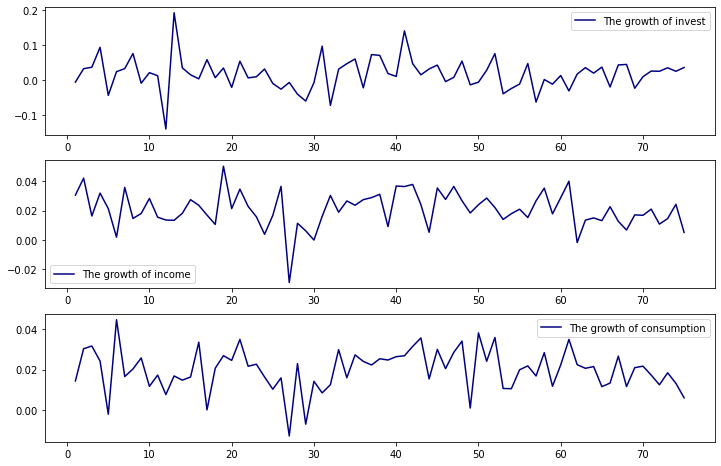

In [4]:
# Dữ liệu về tăng trưởng
data = westGM.diff().dropna()
# Vẽ đồ thị
fig, ax = plt.subplots(3,1,figsize=(12,8))
data['invest'].plot(color="navy", ax=ax[0], label = "The growth of invest")
data['income'].plot(color="navy", ax=ax[1], label = "The growth of income")
data['cons'].plot(color="navy", ax=ax[2], label = "The growth of consumption")
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

In [5]:
from statsmodels.tsa.api import VAR

# Chọn bậc của mô hình VAR
model = VAR(data)
lag = model.select_order(maxlags = 5)
lag.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


,AIC,BIC,FPE,HQIC
0,-24.39,-24.29*,2.557e-11,-24.35*
1,-24.48,-24.09,2.344e-11,-24.32
2,-24.59*,-23.91,2.099e-11*,-24.32
3,-24.44,-23.47,2.450e-11,-24.06
4,-24.43,-23.17,2.500e-11,-23.93
5,-24.25,-22.71,3.000e-11,-23.64


In [6]:
# Ước lượng mô hình VAR(2): chọn p=2 theo tiêu chuẩn AIC
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Dec, 2023
Time:                     23:31:26
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -23.8905
Nobs:                     73.0000    HQIC:                  -24.2869
Log likelihood:           606.307    FPE:                2.18315e-11
AIC:                     -24.5494    Det(Omega_mle):     1.65876e-11
--------------------------------------------------------------------
Results for equation invest
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.016722         0.017226           -0.971           0.332
L1.invest        -0.319631         0.125456           -2.548           0.011
L1.income         0.145989         0.545666            0.268           0.78

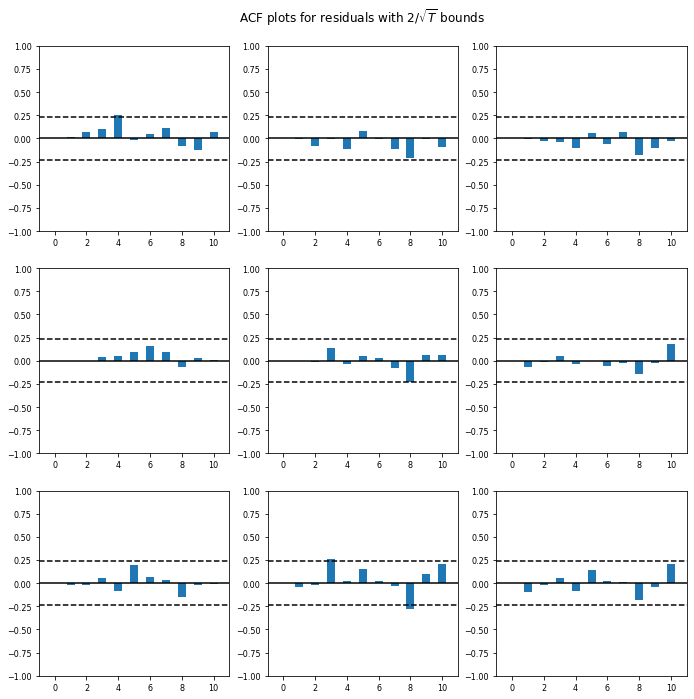

In [7]:
# Đánh giá phần dư
fig = result.plot_acorr()

In [8]:
# Kiểm định phân phối chuẩn
result.test_normality().summary()

Test statistic,Critical value,p-value,df
21.96,12.59,0.001,6


In [9]:
# Kiểm định tính không tương quan
result.test_whiteness().summary()

Test statistic,Critical value,p-value,df
56.81,92.81,0.905,72


In [10]:
# Tính khoảng tin cậy dự báo
df = result.forecast_interval(data.values, 5)
top = data.values[-1]    # Thêm quan sát cuối
mean = pd.DataFrame(np.vstack([top,df[0]]), columns=['invest','income','cons'])
lower = pd.DataFrame(np.vstack([top,df[1]]), columns=['invest','income','cons'])
upper = pd.DataFrame(np.vstack([top,df[2]]), columns=['invest','income','cons'])

# Hiển thị
mean

,invest,income,cons
0,0.036368,0.005173,0.005990
1,-0.010811,0.019911,0.021629
2,0.010781,0.020349,0.014654
3,0.021116,0.016981,0.019826
4,0.012358,0.020601,0.018720
5,0.017411,0.019744,0.018887


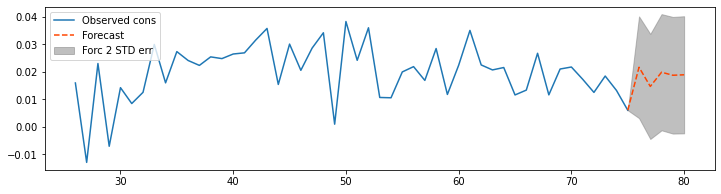

In [11]:
# Chọn biến để biểu diễn
varname = 'cons'       
fig, ax = plt.subplots(figsize=(12,3))

# Vẽ khoảng tin cậy dự báo
ind = mean.index + data.index[-1]
ax.plot(data[varname][-50:], label='Observed '+varname)   # Dữ liệu gốc
ax.plot(ind, mean[varname], linestyle='--', color='orangered', label='Forecast')
ax.fill_between(ind, lower[varname], upper[varname],
                label='Forc 2 STD err',
                color='grey',       # The outline color
                alpha=0.5)          # Transparency of the fill
plt.legend(loc='upper left')
plt.show()

In [12]:
# Phân tích nhân quả Granger
result.test_causality('invest', ['income','cons']).summary()

Test statistic,Critical value,p-value,df
1.592,2.417,0.178,"(4, 198)"
